<a href="https://colab.research.google.com/github/Shubhkarman-Singh09/Python_Assignment/blob/main/Shubhkarman_Singh's_MCND_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
import os
os.listdir('/content/drive/MyDrive/MCND Dataset')


['AD_ModerateDemented',
 'BT_pituitary',
 'Normal',
 'AD_VeryMildDemented',
 'MS',
 'BT_meningioma',
 'AD_MildDemented',
 'BT_glioma']

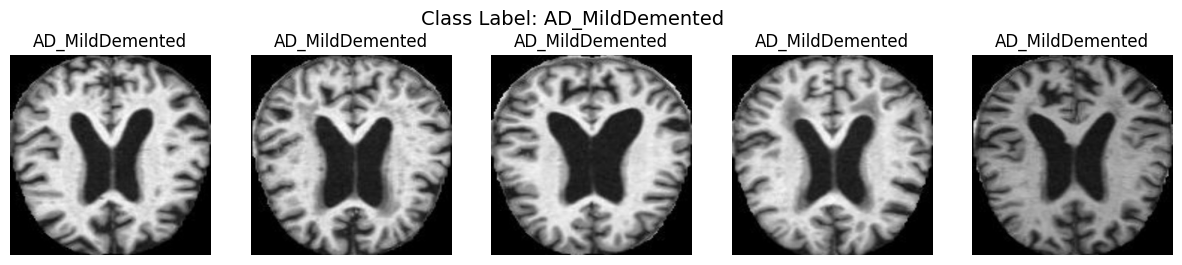

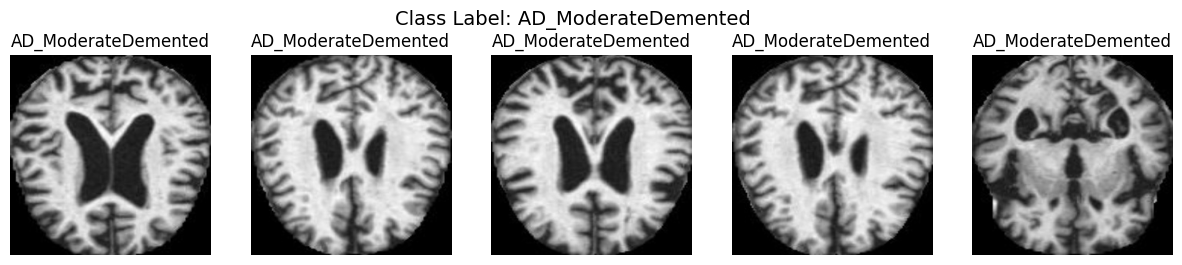

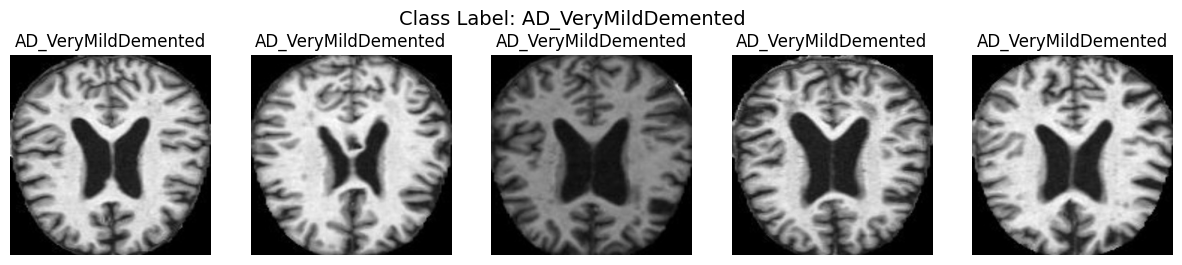

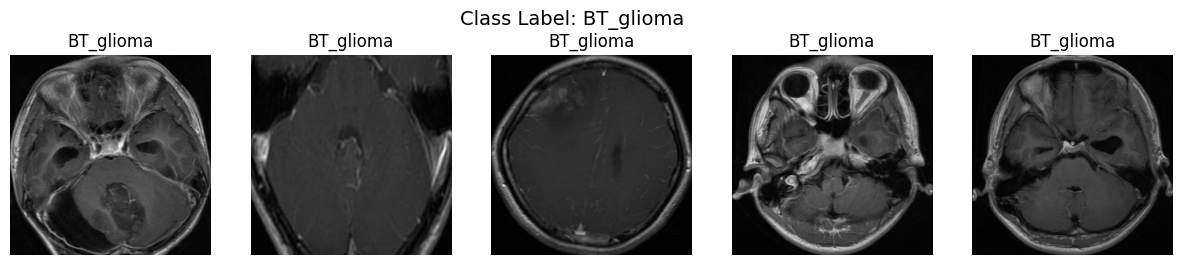

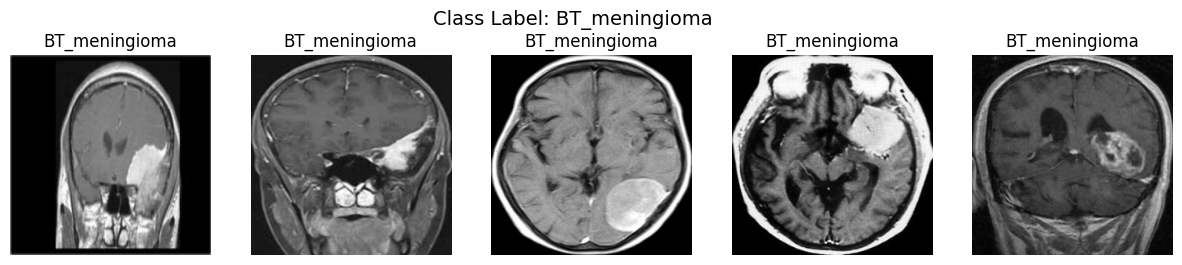

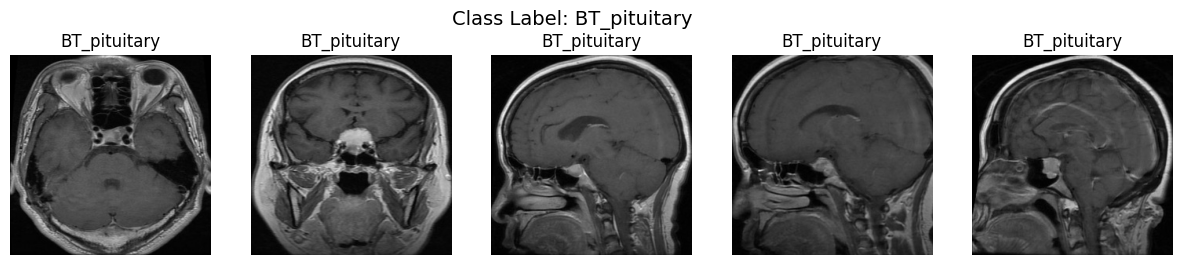

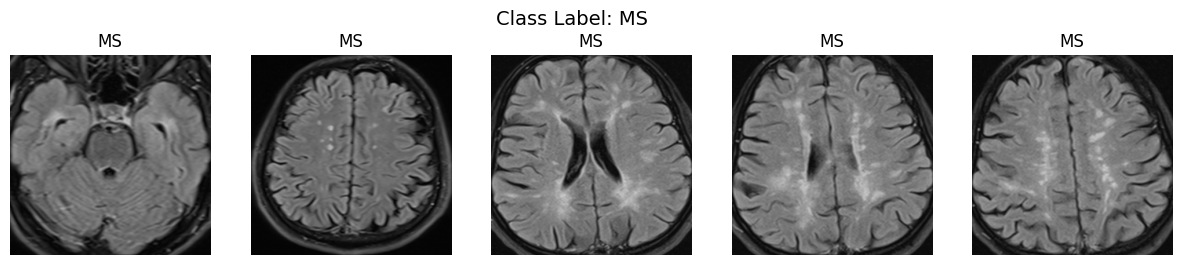

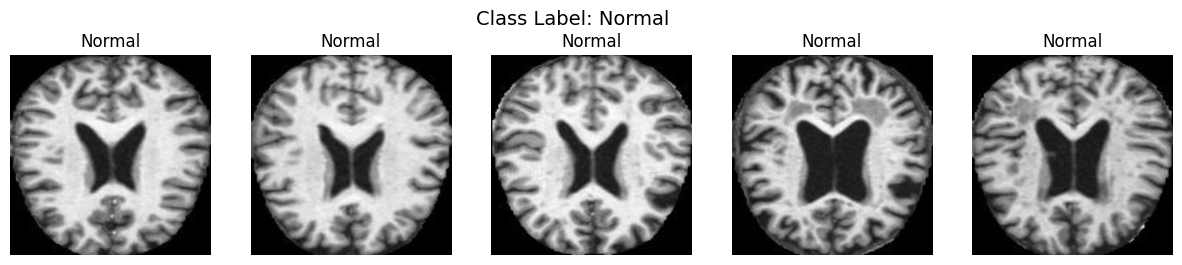

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_root = '/content/drive/MyDrive/MCND Dataset'
classes = sorted(os.listdir(dataset_root))

for cls in classes:
    cls_path = os.path.join(dataset_root, cls)
    images = sorted(os.listdir(cls_path))[:5]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Class Label: {cls}', fontsize=14)

    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')

    plt.show()


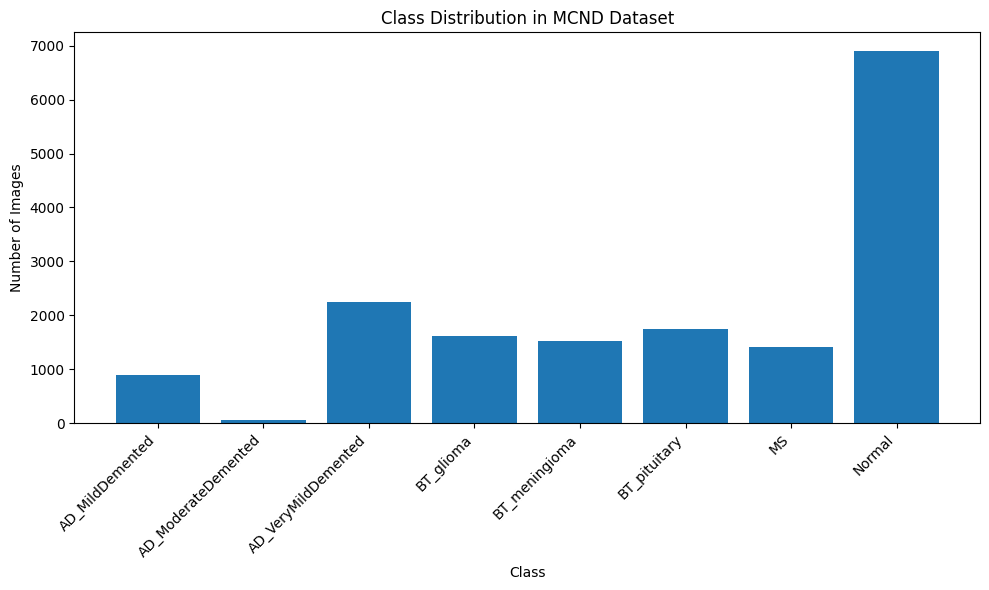

In [4]:
import os
import matplotlib.pyplot as plt

dataset_root = '/content/drive/MyDrive/MCND Dataset'
classes = sorted(os.listdir(dataset_root))

class_counts = []
for cls in classes:
    cls_path = os.path.join(dataset_root, cls)
    class_counts.append(len(os.listdir(cls_path)))

plt.figure(figsize=(10, 6))
plt.bar(classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in MCND Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


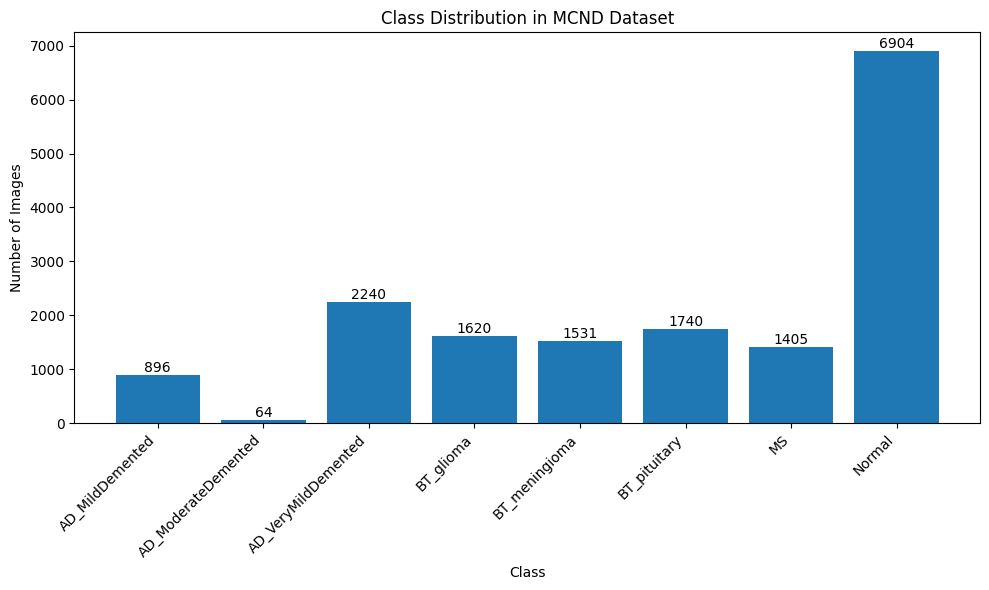

In [5]:
import os
import matplotlib.pyplot as plt
dataset_root = '/content/drive/MyDrive/MCND Dataset'
classes = sorted(os.listdir(dataset_root))
class_counts = []
for cls in classes:
    cls_path = os.path.join(dataset_root, cls)
    class_counts.append(len(os.listdir(cls_path)))
plt.figure(figsize=(10, 6))
bars = plt.bar(classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in MCND Dataset')
plt.xticks(rotation=45, ha='right')
for bar, count in zip(bars, class_counts):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(count),
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


In [6]:
import os
import numpy as np
from PIL import Image

dataset_root = '/content/drive/MyDrive/MCND Dataset'
classes = sorted(os.listdir(dataset_root))

class_stats = {}

for cls in classes:
    cls_path = os.path.join(dataset_root, cls)

    all_pixels = []

    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = Image.open(img_path).convert('L')
        img_array = np.array(img).astype(np.float32)
        all_pixels.append(img_array.flatten())

    all_pixels = np.concatenate(all_pixels)

    class_stats[cls] = {
        'Mean': np.mean(all_pixels),
        'Std': np.std(all_pixels),
        'Min': np.min(all_pixels),
        'Max': np.max(all_pixels)
    }

for cls, stats in class_stats.items():
    print(cls)
    for k, v in stats.items():
        print(f'{k}: {v:.4f}')
    print('-' * 30)


AD_MildDemented
Mean: 109.9283
Std: 76.6621
Min: 0.0000
Max: 255.0000
------------------------------
AD_ModerateDemented
Mean: 113.1576
Std: 78.8679
Min: 0.0000
Max: 255.0000
------------------------------
AD_VeryMildDemented
Mean: 114.2141
Std: 77.6652
Min: 0.0000
Max: 255.0000
------------------------------
BT_glioma
Mean: 56.3611
Std: 37.8062
Min: 0.0000
Max: 255.0000
------------------------------
BT_meningioma
Mean: 68.2600
Std: 47.1620
Min: 0.0000
Max: 255.0000
------------------------------
BT_pituitary
Mean: 61.7855
Std: 39.1005
Min: 0.0000
Max: 255.0000
------------------------------
MS
Mean: 70.8483
Std: 41.1802
Min: 0.0000
Max: 255.0000
------------------------------
Normal
Mean: 99.7829
Std: 68.8796
Min: 0.0000
Max: 255.0000
------------------------------


#                         **   Inferences **


First. Alzheimer’s disease spectrum.
The AD related classes Mild Demented Moderate Demented and Very Mild Demented exhibit very similar mean intensity values ranging from approximately 109 to 114 and comparable standard deviations around 76 to 79. This indicates that global pixel intensity statistics alone are insufficient to discriminate between stages of Alzheimer’s disease. The similarity suggests that disease progression in AD manifests more through subtle structural and textural changes rather than large scale intensity shifts. From a modeling perspective this justifies the need for fine grained spatial and region specific feature learning rather than relying on global intensity cues.

Second. Brain tumor classes.
The tumor categories glioma meningioma and pituitary show significantly lower mean intensities in the range of approximately 56 to 68 with much smaller standard deviations compared to AD and Normal classes. This indicates darker overall appearance and reduced global contrast which is consistent with localized abnormal tissue regions surrounded by relatively uniform background. The separation in mean and variance from AD classes suggests that global intensity statistics can partially discriminate tumor versus neurodegenerative conditions.

Third. Multiple sclerosis class.
The MS class exhibits intermediate behavior with a mean intensity around 71 and moderate variance. This places it closer to tumor classes than AD classes in terms of global statistics. This overlap implies that MS lesions affect localized intensity patterns but do not introduce strong global brightness changes. As a result MS classification likely benefits from lesion level or patch based representations rather than whole image statistics.

Fourth. Normal class behavior.
Normal images have a mean intensity close to 100 with high standard deviation. This indicates a wide and balanced intensity distribution corresponding to healthy anatomical structures with clear contrast between tissues. Interestingly Normal images partially overlap with AD classes in global statistics which reinforces that differentiating early AD from healthy controls requires structural and morphological features rather than intensity based separation.

Fifth. Intensity range consistency.
All classes span the full intensity range from 0 to 255. This confirms consistent preprocessing and scaling across datasets. It also implies that min max normalization will not distort class specific information and can be safely applied without introducing bias.

Overall conclusion.
Global intensity statistics are effective for coarse discrimination between disease families such as tumor versus neurodegenerative disorders but are insufficient for fine grained classification within Alzheimer’s stages or between Normal and early AD. This strongly supports the use of spatially aware deep learning architectures and region sensitive feature modulation rather than global handcrafted features.

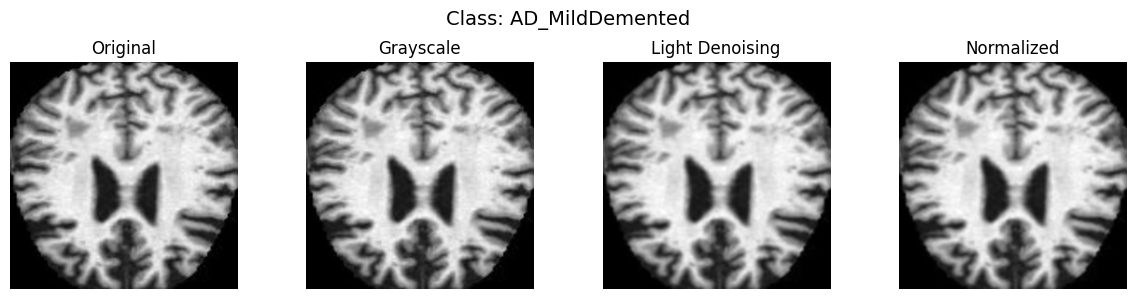

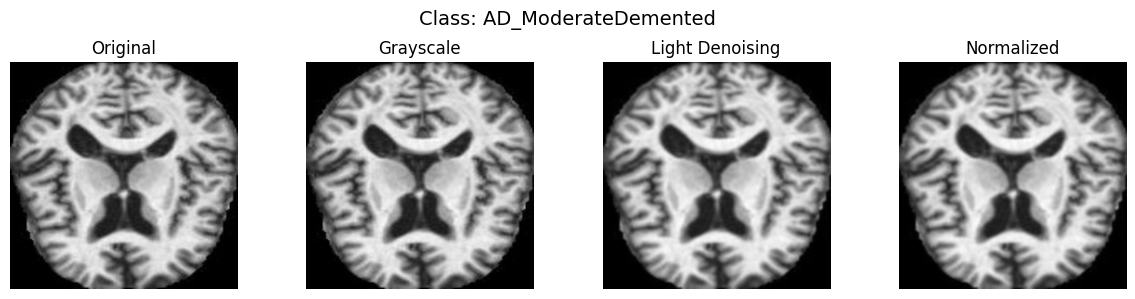

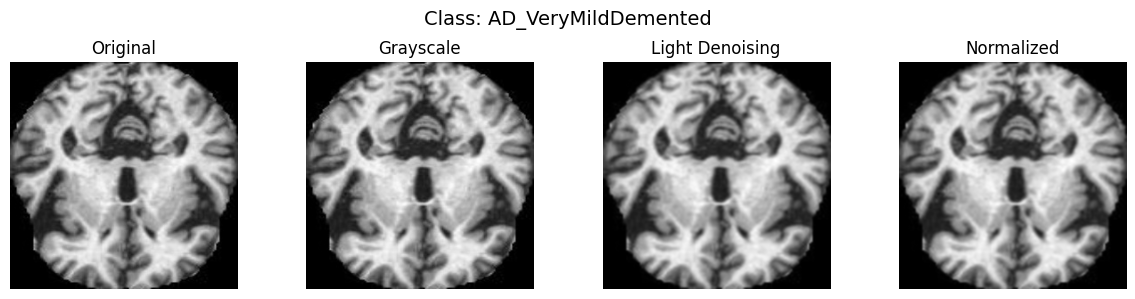

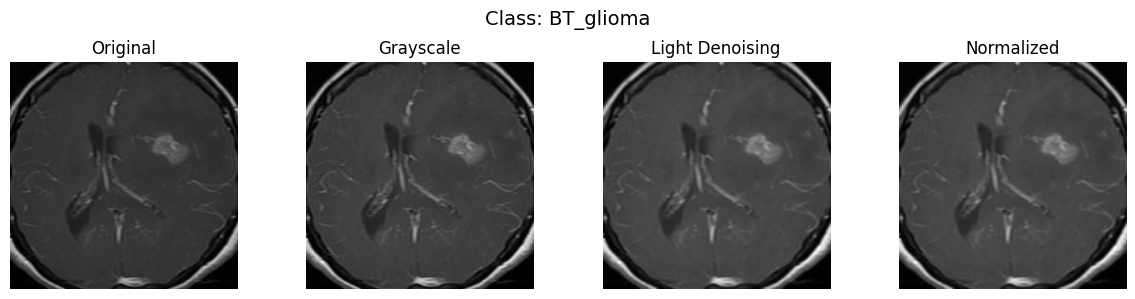

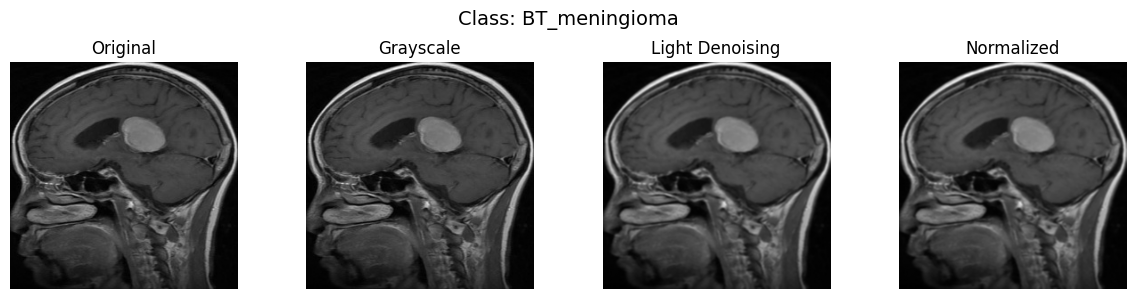

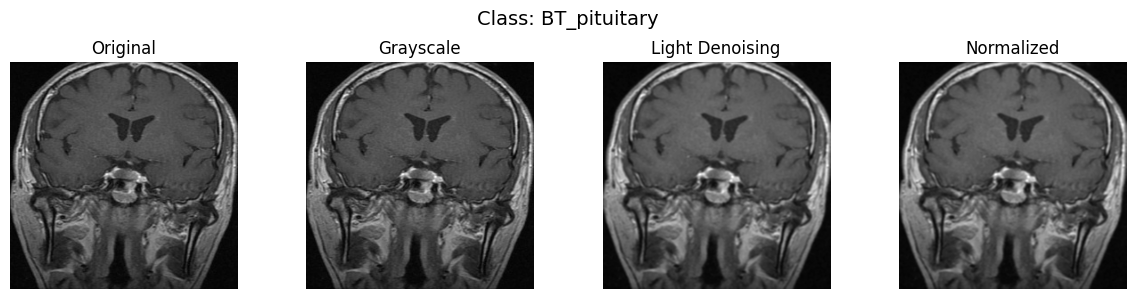

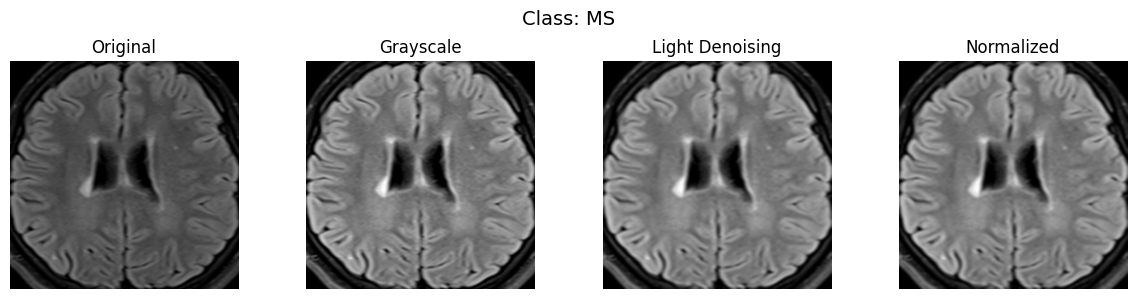

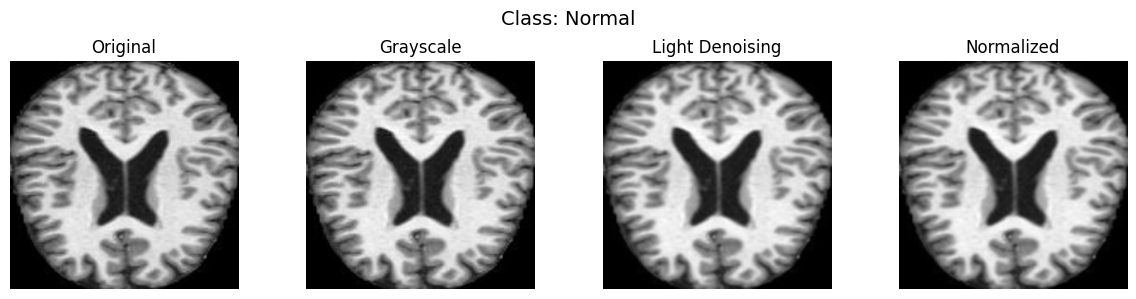

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# =======================
# Dataset path
# =======================
dataset_root = '/content/drive/MyDrive/MCND Dataset'
classes = sorted(os.listdir(dataset_root))

# =======================
# Minimal preprocessing functions
# =======================
def to_grayscale(img):
    if len(img.shape) == 3:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def light_denoise(img):
    return cv2.GaussianBlur(img, (3, 3), 0)

def normalize_intensity(img):
    img = img.astype(np.float32)
    return (img - img.mean()) / (img.std() + 1e-8)

# =======================
# Load one sample per class
# =======================
for cls in classes:
    cls_path = os.path.join(dataset_root, cls)
    img_name = os.listdir(cls_path)[0]
    img_path = os.path.join(cls_path, img_name)

    original = cv2.imread(img_path)
    gray = to_grayscale(original)
    denoised = light_denoise(gray)
    normalized = normalize_intensity(denoised)

    plt.figure(figsize=(12, 3))
    plt.suptitle(f'Class: {cls}', fontsize=14)

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(denoised, cmap='gray')
    plt.title('Light Denoising')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(normalized, cmap='gray')
    plt.title('Normalized')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import os
import cv2
import numpy as np

# =======================
# Paths
# =======================
input_root = '/content/drive/MyDrive/MCND Dataset'
output_root = '/content/drive/MyDrive/MCND_Preprocessed'

os.makedirs(output_root, exist_ok=True)

# =======================
# Preprocessing functions
# =======================
def to_grayscale(img):
    if len(img.shape) == 3:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def light_denoise(img):
    return cv2.GaussianBlur(img, (3, 3), 0)

def normalize_intensity(img):
    img = img.astype(np.float32)
    img = (img - img.mean()) / (img.std() + 1e-8)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    return img.astype(np.uint8)

# =======================
# Batch preprocessing
# =======================
for cls in sorted(os.listdir(input_root)):
    cls_input_path = os.path.join(input_root, cls)
    cls_output_path = os.path.join(output_root, cls)
    os.makedirs(cls_output_path, exist_ok=True)

    for img_name in os.listdir(cls_input_path):
        img_path = os.path.join(cls_input_path, img_name)

        img = cv2.imread(img_path)
        if img is None:
            continue

        gray = to_grayscale(img)
        denoised = light_denoise(gray)
        processed = normalize_intensity(denoised)

        save_path = os.path.join(cls_output_path, img_name)
        cv2.imwrite(save_path, processed)

print('Preprocessing completed for all classes and all images.')


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt


preprocessed_root = '/content/drive/MyDrive/MCND_Preprocessed'
classes = sorted(os.listdir(preprocessed_root))


for cls in classes:
    cls_path = os.path.join(preprocessed_root, cls)
    images = sorted(os.listdir(cls_path))[:5]
    plt.figure(figsize=(15, 3))
    plt.suptitle(f'Preprocessed Samples | Class: {cls}', fontsize=14)
    for i, img_name in enumerate(images):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(cls)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import pywt
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import sobel
from skimage.measure import shannon_entropy

# =======================
# Paths
# =======================
dataset_root = '/content/drive/MyDrive/MCND_Preprocessed'
output_root = '/content/drive/MyDrive/MCND_Class_Features'
os.makedirs(output_root, exist_ok=True)

# =======================
# Feature extraction
# =======================
for cls in sorted(os.listdir(dataset_root)):
    cls_path = os.path.join(dataset_root, cls)
    features = []
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = img.astype(np.uint8)
        # -------- Texture features --------
        glcm = graycomatrix(
            img,
            distances=[1],
            angles=[0],
            levels=256,
            symmetric=True,
            normed=True
        )
        glcm_contrast = graycoprops(glcm, 'contrast')[0, 0]
        glcm_homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        entropy_val = shannon_entropy(img)
        mean_intensity = np.mean(img)
        std_intensity = np.std(img)
        edge_map = sobel(img)
        edge_density = np.mean(edge_map)
        # -------- Multi resolution and frequency features --------
        coeffs2 = pywt.dwt2(img, 'haar')
        LL, (LH, HL, HH) = coeffs2
        LL_energy = np.mean(np.square(LL))
        LH_energy = np.mean(np.square(LH))
        HL_energy = np.mean(np.square(HL))
        HH_energy = np.mean(np.square(HH))
        features.append([
            glcm_contrast,
            glcm_homogeneity,
            entropy_val,
            mean_intensity,
            std_intensity,
            edge_density,
            LL_energy,
            LH_energy,
            HL_energy,
            HH_energy
        ])

    # =======================
    # Save class-wise CSV
    # =======================
    columns = [
        'GLCM_Contrast',
        'GLCM_Homogeneity',
        'Entropy',
        'MeanIntensity',
        'StdIntensity',
        'EdgeDensity',
        'Wavelet_LL_Energy',
        'Wavelet_LH_Energy',
        'Wavelet_HL_Energy',
        'Wavelet_HH_Energy'
    ]

    df = pd.DataFrame(features, columns=columns)
    output_csv = os.path.join(output_root, f'{cls}_features.csv')
    df.to_csv(output_csv, index=False)

    print(f'Features saved for class: {cls}')

print('Feature extraction completed for all classes.')


In [ ]:
import os
import pandas as pd

# =======================
# Paths
# =======================
image_root = '/content/drive/MyDrive/MCND_Preprocessed'
feature_root = '/content/drive/MyDrive/MCND_Class_Features'

# =======================
# Verification
# =======================
for cls in sorted(os.listdir(image_root)):
    image_path = os.path.join(image_root, cls)
    csv_path = os.path.join(feature_root, f'{cls}_features.csv')

    if not os.path.exists(csv_path):
        print(f'CSV missing for class: {cls}')
        continue

    num_images = len([
        f for f in os.listdir(image_path)
        if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'))
    ])

    df = pd.read_csv(csv_path)
    num_rows = df.shape[0]

    if num_images == num_rows:
        print(f'{cls}: OK | Images = {num_images} | Rows = {num_rows}')
    else:
        print(f'{cls}: MISMATCH | Images = {num_images} | Rows = {num_rows}')


In [ ]:
import pandas as pd
import numpy as np

# Path where CSV files are stored
path = "/content/drive/MyDrive/MCND_Class_Features/"

files = {
    "AD_VeryMild": "AD_VeryMildDemented_features.csv",
    "AD_Mild": "AD_MildDemented_features.csv",
    "AD_Moderate": "AD_ModerateDemented_features.csv",
    "BT_Glioma": "BT_glioma_features.csv",
    "BT_Meningioma": "BT_meningioma_features.csv",
    "BT_Pituitary": "BT_pituitary_features.csv",
    "MS": "MS_features.csv",
    "Normal": "Normal_features.csv"
}

dataframes = []

for label, (cls, file) in enumerate(files.items()):
    df = pd.read_csv(path + file)
    df["Label"] = label
    dataframes.append(df)

# Merge all classes
combined_df = pd.concat(dataframes, axis=0)

# Randomize to remove bias
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save common CSV
combined_df.to_csv("MCND_Combined_Randomized.csv", index=False)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = combined_df.drop("Label", axis=1).values
y = combined_df["Label"].values

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
models = {
    "SVM_RBF": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "GradientBoosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic_OVR": LogisticRegression(max_iter=2000, multi_class="ovr")
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []

for model_name, model in models.items():
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        results.append({
            "Model": model_name,
            "Fold": fold + 1,
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision_Macro": precision_score(y_val, y_pred, average="macro"),
            "Precision_Weighted": precision_score(y_val, y_pred, average="weighted"),
            "Recall_Macro": recall_score(y_val, y_pred, average="macro"),
            "Recall_Weighted": recall_score(y_val, y_pred, average="weighted"),
            "F1_Macro": f1_score(y_val, y_pred, average="macro"),
            "F1_Weighted": f1_score(y_val, y_pred, average="weighted")
        })

results_df = pd.DataFrame(results)
summary_df = results_df.groupby("Model").mean()

print(summary_df)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [ ]:
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

model = models["SVM_RBF"]
model.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} AUC = {roc_auc:.3f}")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve for MCND Classification")
plt.legend(loc="lower right")

plt.savefig("MCND_Multiclass_ROC_300DPI.png", dpi=300, bbox_inches="tight")
plt.show()


# **PCA Effect on Global Performance**

In [ ]:
import pandas as pd
import numpy as np

# Load combined randomized CSV
df = pd.read_csv("MCND_Combined_Randomized.csv")

X = df.drop("Label", axis=1).values
y = df["Label"].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
plt.bar(
    range(1, 9),
    explained_variance * 100
)

plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Percentage")
plt.title("Top 8 PCA Components Explained Variance")

plt.xticks(range(1, 6))
plt.grid(alpha=0.3)

plt.savefig("PCA_Top8_Explained_Variance_300DPI.png",
            dpi=300,
            bbox_inches="tight")
plt.show()


In [ ]:
plt.figure(figsize=(7, 6))

scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=y,
    s=20
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection using First Two Components")

plt.legend(
    *scatter.legend_elements(),
    title="Classes",
    loc="best"
)

plt.grid(alpha=0.3)

plt.savefig("PCA_2D_Visualization_300DPI.png",
            dpi=300,
            bbox_inches="tight")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# Load combined dataset
df = pd.read_csv("MCND_Combined_Randomized.csv")

X = df.drop("Label", axis=1).values
y = df["Label"].values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with top 5 components
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
models = {
    "SVM_RBF": SVC(kernel="rbf", probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=200),
    "GradientBoosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic_OVR": LogisticRegression(max_iter=2000, multi_class="ovr")
}


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results_pca = []

for model_name, model in models.items():
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_pca, y)):
        X_tr, X_val = X_pca[train_idx], X_pca[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        results_pca.append({
            "Model": model_name,
            "Fold": fold + 1,
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision_Macro": precision_score(y_val, y_pred, average="macro"),
            "Precision_Weighted": precision_score(y_val, y_pred, average="weighted"),
            "Recall_Macro": recall_score(y_val, y_pred, average="macro"),
            "Recall_Weighted": recall_score(y_val, y_pred, average="weighted"),
            "F1_Macro": f1_score(y_val, y_pred, average="macro"),
            "F1_Weighted": f1_score(y_val, y_pred, average="weighted")
        })


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results_pca = []

for model_name, model in models.items():
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_pca, y)):
        X_tr, X_val = X_pca[train_idx], X_pca[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        results_pca.append({
            "Model": model_name,
            "Fold": fold + 1,
            "Accuracy": accuracy_score(y_val, y_pred),
            "Precision_Macro": precision_score(y_val, y_pred, average="macro"),
            "Precision_Weighted": precision_score(y_val, y_pred, average="weighted"),
            "Recall_Macro": recall_score(y_val, y_pred, average="macro"),
            "Recall_Weighted": recall_score(y_val, y_pred, average="weighted"),
            "F1_Macro": f1_score(y_val, y_pred, average="macro"),
            "F1_Weighted": f1_score(y_val, y_pred, average="weighted")
        })


In [ ]:
results_pca_df = pd.DataFrame(results_pca)

summary_pca = results_pca_df.groupby("Model").mean()

print(summary_pca)


In [ ]:
comparison = summary_df[["Accuracy", "F1_Macro", "F1_Weighted"]].join(
    summary_pca[["Accuracy", "F1_Macro", "F1_Weighted"]],
    lsuffix="_Original",
    rsuffix="_PCA"
)

print(comparison)


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

root = "/content/drive/MyDrive/MCND_Preprocessed"

# pick one sample image from first class
cls = sorted(os.listdir(root))[0]
img_path = os.path.join(root, cls, os.listdir(os.path.join(root, cls))[0])

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(cv2.GaussianBlur(img, (51,51), 0), cmap='gray')
plt.title("Low-Frequency Intensity (Bias-like)")
plt.axis('off')

plt.subplot(1,3,3)
plt.plot(img[img.shape[0]//2])
plt.title("Center Line Intensity Profile")

plt.tight_layout()
plt.show()


In [ ]:
# =========================================================
# GPU-Optimized DAMBN Training Script (Colab Ready)
# =========================================================

# -------------------------------
# 0. Basic GPU setup
# -------------------------------
import torch
torch.backends.cudnn.benchmark = True

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU:", torch.cuda.get_device_name(0))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------------
# 1. Imports
# -------------------------------
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
from tqdm import tqdm

# -------------------------------
# 2. Dataset
# -------------------------------
DATA_PATH = "/content/drive/MyDrive/MCND_Preprocessed"

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(DATA_PATH, transform=transform)
num_classes = len(dataset.classes)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(
    train_ds,
    batch_size=32,
    shuffle=True,
    num_workers=4,
    pin_memory=True
)

test_loader = DataLoader(
    test_ds,
    batch_size=32,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

print("Classes:", dataset.classes)

# -------------------------------
# 3. Model Blocks
# -------------------------------
class ResidualBlock(nn.Module):
    def __init__(self, ch):
        super().__init__()
        self.c1 = nn.Conv2d(ch, ch, 3, padding=1)
        self.b1 = nn.BatchNorm2d(ch)
        self.c2 = nn.Conv2d(ch, ch, 3, padding=1)
        self.b2 = nn.BatchNorm2d(ch)
        self.r = nn.ReLU()

    def forward(self, x):
        i = x
        x = self.r(self.b1(self.c1(x)))
        x = self.b2(self.c2(x))
        return self.r(x + i)

class ChannelAttention(nn.Module):
    def __init__(self, ch, r=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(ch, ch // r),
            nn.ReLU(),
            nn.Linear(ch // r, ch),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.shape
        y = x.view(b, c, -1).mean(dim=2)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y

class SharedEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 32, 3, padding=1)
        self.b1 = nn.BatchNorm2d(32)
        self.r1 = ResidualBlock(32)

        self.c2 = nn.Conv2d(32, 64, 3, padding=1)
        self.b2 = nn.BatchNorm2d(64)
        self.r2 = ResidualBlock(64)

        self.align = nn.Conv2d(64, 32, 1)
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x1 = self.relu(self.b1(self.c1(x)))
        x1 = self.r1(x1)
        x1p = self.pool(x1)

        x2 = self.relu(self.b2(self.c2(x1p)))
        x2 = self.r2(x2)
        x2p = self.pool(x2)

        x2u = F.interpolate(x2p, size=x1.shape[2:], mode='bilinear', align_corners=False)
        x2u = self.align(x2u)
        return x1 + x2u

class DisorderBranch(nn.Module):
    def __init__(self):
        super().__init__()
        self.c = nn.Conv2d(32, 128, 3, padding=1)
        self.b = nn.BatchNorm2d(128)
        self.attn = ChannelAttention(128)
        self.r = nn.ReLU()
        self.d = nn.Dropout(0.3)
        self.pool = nn.AdaptiveAvgPool2d((1,1))

    def forward(self, x):
        x = self.r(self.b(self.c(x)))
        x = self.attn(x)
        x = self.d(x)
        return self.pool(x).view(x.size(0), -1)

class DAMBN(nn.Module):
    def __init__(self, num_classes, branches=4):
        super().__init__()
        self.shared = SharedEncoder()
        self.branches = nn.ModuleList([DisorderBranch() for _ in range(branches)])
        self.fc = nn.Linear(128 * branches, num_classes)

    def forward(self, x):
        x = self.shared(x)
        feats = [b(x) for b in self.branches]
        return self.fc(torch.cat(feats, dim=1))

# -------------------------------
# 4. Training Setup
# -------------------------------
model = DAMBN(num_classes).to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)

scaler = torch.cuda.amp.GradScaler()

# -------------------------------
# 5. Training Loop (AMP Enabled)
# -------------------------------
EPOCHS = 200
train_losses, val_accs, val_f1s = [], [], []

for epoch in range(EPOCHS):
    model.train()
    run_loss = 0.0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False):
        imgs = imgs.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad()

        with torch.cuda.amp.autocast():
            outputs = model(imgs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), 2.0)

        scaler.step(optimizer)
        scaler.update()

        run_loss += loss.item()

    train_loss = run_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    preds_all, labels_all = [], []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            preds = torch.argmax(model(imgs), dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())

    val_acc = correct / total
    val_f1 = f1_score(labels_all, preds_all, average="macro")

    val_accs.append(val_acc)
    val_f1s.append(val_f1)
    scheduler.step()

    print(f"Epoch {epoch+1}/{EPOCHS} | Loss {train_loss:.4f} | Val Acc {val_acc:.4f} | Val F1 {val_f1:.4f}")

# -------------------------------
# 6. Results
# -------------------------------
plt.figure(figsize=(9,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accs, label="Val Accuracy")
plt.plot(val_f1s, label="Val F1")
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(labels_all, preds_all)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=dataset.classes,
            yticklabels=dataset.classes,
            cmap='Blues')
plt.show()

print(classification_report(labels_all, preds_all, target_names=dataset.classes))


In [ ]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # IMPORTANT FIX
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=DATA_PATH, transform=transform)

num_classes = len(dataset.classes)
print("Classes:", dataset.classes)

train_size = int(0.8 * len(dataset))
test_size  = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ===============================
# 4. Disorder-Aware Multi-Branch Model
# ===============================
class SharedEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

    def forward(self, x):
        return self.net(x)


class DisorderBranch(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )

    def forward(self, x):
        return self.net(x).view(x.size(0), -1)


class DAMBN(nn.Module):
    def __init__(self, num_classes=8, num_branches=4):
        super().__init__()
        self.shared = SharedEncoder()
        self.branches = nn.ModuleList([DisorderBranch() for _ in range(num_branches)])
        self.classifier = nn.Linear(128 * num_branches, num_classes)

    def forward(self, x):
        x = self.shared(x)
        branch_features = [b(x) for b in self.branches]
        fused = torch.cat(branch_features, dim=1)
        return self.classifier(fused)

# ===============================
# 5. Training Setup
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DAMBN(num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-4)

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
from tqdm import tqdm

# -------------------------------
# 2. Dataset
# -------------------------------
DATA_PATH = "/content/drive/MyDrive/MCND_Preprocessed"

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(DATA_PATH, transform=transform)
num_classes = len(dataset.classes)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_ds, test_ds = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=16, shuffle=False, num_workers=2)

print("Classes:", dataset.classes)

# -------------------------------
# 3. Model Blocks
# -------------------------------
class ResidualBlock(nn.Module):
    def __init__(self, ch):
        super().__init__()
        self.c1 = nn.Conv2d(ch, ch, 3, padding=1)
        self.b1 = nn.BatchNorm2d(ch)
        self.c2 = nn.Conv2d(ch, ch, 3, padding=1)
        self.b2 = nn.BatchNorm2d(ch)
        self.r = nn.ReLU()

    def forward(self, x):
        i = x
        x = self.r(self.b1(self.c1(x)))
        x = self.b2(self.c2(x))
        return self.r(x + i)


class ChannelAttention(nn.Module):
    def __init__(self, ch, r=16):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(ch, ch // r),
            nn.ReLU(),
            nn.Linear(ch // r, ch),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.shape
        y = x.view(b, c, -1).mean(dim=2)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y


# -------------------------------
# 4. Shared Encoder (FIXED)
# -------------------------------
class SharedEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 32, 3, padding=1)
        self.b1 = nn.BatchNorm2d(32)
        self.r1 = ResidualBlock(32)

        self.c2 = nn.Conv2d(32, 64, 3, padding=1)
        self.b2 = nn.BatchNorm2d(64)
        self.r2 = ResidualBlock(64)

        self.align = nn.Conv2d(64, 32, 1)   # 🔥 channel alignment
        self.pool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x1 = self.relu(self.b1(self.c1(x)))
        x1 = self.r1(x1)
        x1p = self.pool(x1)

        x2 = self.relu(self.b2(self.c2(x1p)))
        x2 = self.r2(x2)
        x2p = self.pool(x2)

        x2u = F.interpolate(x2p, size=x1.shape[2:], mode='bilinear', align_corners=False)
        x2u = self.align(x2u)  # 64 → 32

        return x1 + x2u


# -------------------------------
# 5. Disorder Branch
# -------------------------------
class DisorderBranch(nn.Module):
    def __init__(self):
        super().__init__()
        self.c = nn.Conv2d(32, 128, 3, padding=1)
        self.b = nn.BatchNorm2d(128)
        self.attn = ChannelAttention(128)
        self.r = nn.ReLU()
        self.d = nn.Dropout(0.3)
        self.pool = nn.AdaptiveAvgPool2d((1,1))

    def forward(self, x):
        x = self.r(self.b(self.c(x)))
        x = self.attn(x)
        x = self.d(x)
        return self.pool(x).view(x.size(0), -1)


# -------------------------------
# 6. Full DAMBN
# -------------------------------
class DAMBN(nn.Module):
    def __init__(self, num_classes, branches=4):
        super().__init__()
        self.shared = SharedEncoder()
        self.branches = nn.ModuleList([DisorderBranch() for _ in range(branches)])
        self.fc = nn.Linear(128 * branches, num_classes)

    def forward(self, x):
        x = self.shared(x)
        feats = [b(x) for b in self.branches]
        return self.fc(torch.cat(feats, dim=1))


# -------------------------------
# 7. Training Setup
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DAMBN(num_classes).to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = StepLR(optimizer, step_size=50, gamma=0.5)

# -------------------------------
# 8. Training + Epoch-wise Validation
# -------------------------------
EPOCHS = 200
train_losses, val_accs, val_f1s = [], [], []

for epoch in range(EPOCHS):
    model.train()
    run_loss = 0.0

    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", leave=False):
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 2.0)
        optimizer.step()

        run_loss += loss.item()

    train_loss = run_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    preds_all, labels_all = [], []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = torch.argmax(model(imgs), dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

            preds_all.extend(preds.cpu().numpy())
            labels_all.extend(labels.cpu().numpy())

    val_acc = correct / total
    val_f1 = f1_score(labels_all, preds_all, average="macro")

    val_accs.append(val_acc)
    val_f1s.append(val_f1)
    scheduler.step()

    print(
        f"Epoch {epoch+1}/{EPOCHS} | "
        f"Loss: {train_loss:.4f} | "
        f"Val Acc: {val_acc:.4f} | "
        f"Val F1: {val_f1:.4f}"
    )

# -------------------------------
# 9. Epoch-wise Curves
# -------------------------------
plt.figure(figsize=(9,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_accs, label="Val Accuracy")
plt.plot(val_f1s, label="Val F1")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Epoch-wise Metrics")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 10. Final Evaluation
# -------------------------------
cm = confusion_matrix(labels_all, preds_all)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=dataset.classes,
            yticklabels=dataset.classes,
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Final Confusion Matrix")
plt.show()

print("\nFinal Classification Report\n")
print(classification_report(
    labels_all,
    preds_all,
    target_names=dataset.classes,
    digits=4
))


In [ ]:
from tqdm import tqdm


In [ ]:
model = DAMBN(num_classes=num_classes).to(device)


In [ ]:
print(model)
